# Fuzzy Logic-based Washing Machine Controller 

In [1]:
pip install scikit-fuzzy  

Note: you may need to restart the kernel to use updated packages.


/Users/gurubalan/anaconda3/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


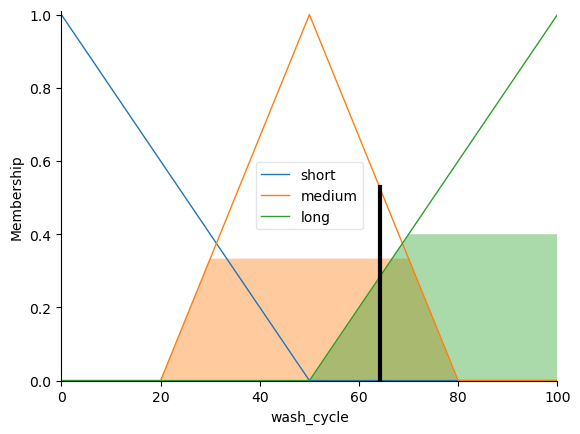

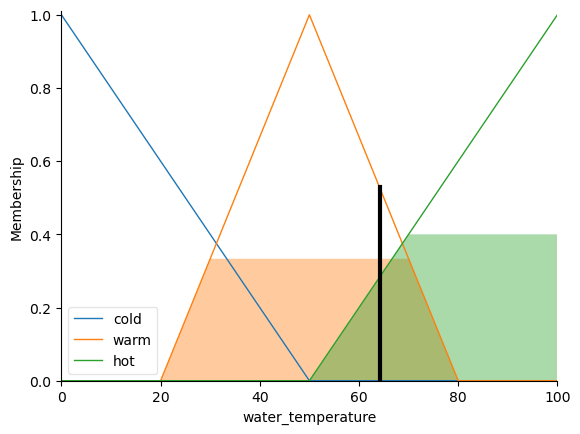

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
dirtiness_level = ctrl.Antecedent(np.arange(0, 11, 1), 'dirtiness_level')
fabric_type = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_type')
wash_cycle = ctrl.Consequent(np.arange(0, 101, 1), 'wash_cycle')
water_temperature = ctrl.Consequent(np.arange(0, 101, 1), 'water_temperature')

# Define membership functions
dirtiness_level['low'] = fuzz.trimf(dirtiness_level.universe, [0, 0, 5])
dirtiness_level['medium'] = fuzz.trimf(dirtiness_level.universe, [2, 5, 8])
dirtiness_level['high'] = fuzz.trimf(dirtiness_level.universe, [5, 10, 10])

fabric_type['delicate'] = fuzz.trimf(fabric_type.universe, [0, 0, 5])
fabric_type['regular'] = fuzz.trimf(fabric_type.universe, [2, 5, 8])
fabric_type['heavy'] = fuzz.trimf(fabric_type.universe, [5, 10, 10])

wash_cycle['short'] = fuzz.trimf(wash_cycle.universe, [0, 0, 50])
wash_cycle['medium'] = fuzz.trimf(wash_cycle.universe, [20, 50, 80])
wash_cycle['long'] = fuzz.trimf(wash_cycle.universe, [50, 100, 100])

water_temperature['cold'] = fuzz.trimf(water_temperature.universe, [0, 0, 50])
water_temperature['warm'] = fuzz.trimf(water_temperature.universe, [20, 50, 80])
water_temperature['hot'] = fuzz.trimf(water_temperature.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(dirtiness_level['low'] & fabric_type['delicate'], (wash_cycle['short'], water_temperature['cold']))
rule2 = ctrl.Rule(dirtiness_level['low'] & fabric_type['regular'], (wash_cycle['short'], water_temperature['warm']))
rule3 = ctrl.Rule(dirtiness_level['low'] & fabric_type['heavy'], (wash_cycle['short'], water_temperature['hot']))

rule4 = ctrl.Rule(dirtiness_level['medium'] & fabric_type['delicate'], (wash_cycle['medium'], water_temperature['warm']))
rule5 = ctrl.Rule(dirtiness_level['medium'] & fabric_type['regular'], (wash_cycle['medium'], water_temperature['warm']))
rule6 = ctrl.Rule(dirtiness_level['medium'] & fabric_type['heavy'], (wash_cycle['medium'], water_temperature['hot']))

rule7 = ctrl.Rule(dirtiness_level['high'] & fabric_type['delicate'], (wash_cycle['long'], water_temperature['warm']))
rule8 = ctrl.Rule(dirtiness_level['high'] & fabric_type['regular'], (wash_cycle['long'], water_temperature['hot']))
rule9 = ctrl.Rule(dirtiness_level['high'] & fabric_type['heavy'], (wash_cycle['long'], water_temperature['hot']))

# Create control system
washing_machine_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# Compute washing parameters
washing_parameters = ctrl.ControlSystemSimulation(washing_machine_ctrl)

# Set inputs
washing_parameters.input['dirtiness_level'] = 7
washing_parameters.input['fabric_type'] = 4

# Compute the result
washing_parameters.compute()

# Visualize the result
wash_cycle.view(sim=washing_parameters)
water_temperature.view(sim=washing_parameters)
plt.show()
